# GEONE - GEOSCLASSIC - categorical variable - Examples in 2D

## Estimation (kriging) and simulation (Sequential Indicator Simulation, SIS)

See notebook `ex_geosclassic_indicator_1d_1.ipynb` for detail explanations about estimation (kriging) and simulation (Sequential Indicator Simulation, SIS) in a grid.

## Examples in 2D
In this notebook, examples in 2D with a stationary covariance model are given.

*Remark: for examples with non-stationary covariance models in 2D, see jupyter notebook `ex_geosclassic_indicator_2d_2_non_stat_cov.ipynb`.*


## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=13, micro=7, releaselevel='final', serial=0)
geone version: 1.3.0


### Remark
The matplotlib figures can be visualized in *interactive* mode:

- `%matplotlib notebook`: enable interactive mode
- `%matplotlib inline`: disable interactive mode

## Category values
A list of category values (facies) must be defined. Let `ncategory` be the length of this list, *i.e.* the number of categories:

- if `ncategory == 1`: the unique category value given must not be equal to 0; this is used for a binary case with values ("unique category value", 0), where 0 indicates the absence of the considered medium; conditioning data values should be "unique category value" or 0
- if `ncategory >= 2`: this is used for a multi-category case with given values (distinct); conditioning data values should be in the list of given values

Then, set color for each category, and color maps for proportions (for further plots).

**Below: select the case with `ncategory` greater than one or equal to one below, comment the undesired cell.**

In [3]:
# Case with ncategory > 1
# -----------------------
category_values = [1., 2., 3.]
ncategory = len(category_values)

# Set colors ...
categVal = category_values
categCol = ['lightblue', 'orange', 'darkgreen'] # must be of length len(categVal)
cmap_categ = [gn.customcolors.custom_cmap(['white', c]) for c in categCol]


In [4]:
# # Case with ncategory = 1
# # -----------------------
# category_values = [2.] # all categories are 2. and 0.
# ncategory = len(category_values)

# # Set colors ...
# categVal = [category_values[0], 0]
# categCol = ['tab:red', 'lightblue'] # must be of length len(categVal)
# cmap_categ = [gn.customcolors.custom_cmap(['white', c]) for c in categCol]

## Grid (2D)

In [5]:
nx, ny = 220, 230  # number of cells
sx, sy = 1.0, 1.0  # cell unit
ox, oy = 0.0, 0.0  # origin

dimension = (nx, ny)
spacing = (sx, sy)
origin = (ox, oy)

## Covariance model

In 2D, a covariance model is given by an instance of the class `geone.covModel.covModel2D` (or `geone.covModel.covModel1D` for omni-directional (isotropic) case).

A covariance model is defined by its elementary contributions given as a list of 2-tuples, 
whose the first component is the type given by a string (`nugget`, `spherical`, `exponential`, `gaussian`, ...) and the second component is a dictionary used to pass the required parameters (the weight (`w`), the range (`r`), ...).

An azimuth angle, `alpha`, can be specified in degrees: the coordinates system Ox'y' supporting the axes of the model (ranges) is obtained from the original coordinates system Oxy by applying a rotation of `-alpha` (i.e. clockwise for positive angle).

*Note: see the notebook `ex_general_multiGaussian.ipynb` for available covariance models and examples.*

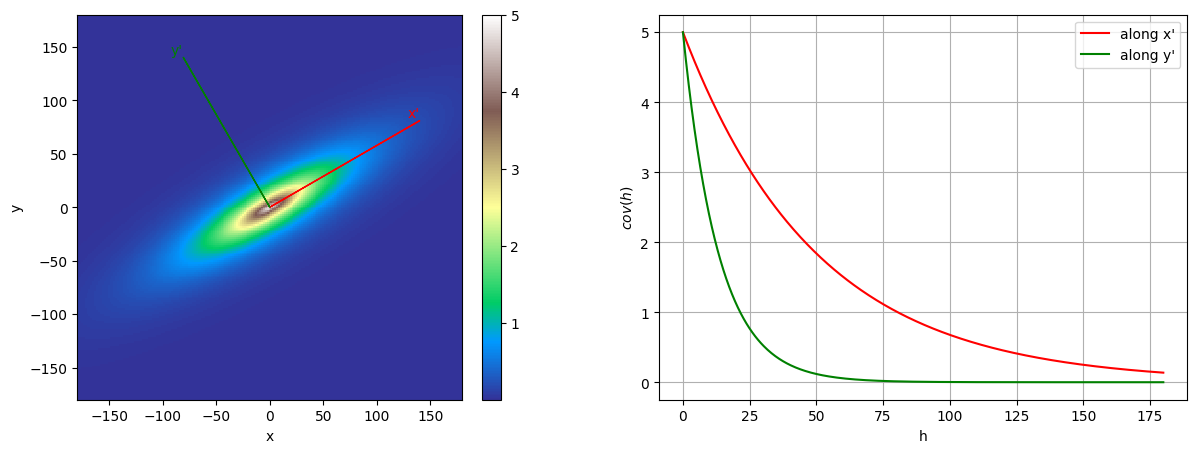

In [6]:
cov_model = gn.covModel.CovModel2D(elem=[
    ('exponential', {'w':5., 'r':[150, 40]}) # elementary contribution
    ], alpha=-30, name='model-2D example')

cov_model.plot_model(figsize=(15,5))
plt.suptitle('')
plt.show()

## 1. Example

### Settings - using data (optional) and probability (constant, optional)

In [7]:
if ncategory > 1:
    # Case with ncategory > 1
    # -----------------------
    # Data
    x = np.array([[ 10.42,  20.32],
                  [ 50.5 ,  40.5],
                  [ 20.24, 150.7],
                  [200.2 , 210.1]]) # data locations (real coordinates)
    v = [ 1., 2., 1., 3.]            # data values
    # x = None
    # v = None

    # Probability, proportion of each category
    probability = [.1, .2, .7] # should sum to 1
    # probability = None

    # Type of kriging
    method = 'simple_kriging'

else:
    # Case with ncategory = 1
    # -----------------------
    # Data
    x = np.array([[ 10.42,  20.32],
                  [ 50.5 ,  40.5],
                  [ 20.24, 150.7],
                  [200.2 , 210.1]]) # data locations (real coordinates)
    v = [ 0., 2., 2., 0.]           # data values
    # x = None
    # v = None

    # Probability, proportion (of non-zero category)
    probability = [.7] # list of one number in the interval [0, 1]
    # probability = None

    # Type of kriging
    method = 'simple_kriging'

### Estimation of probabilities (by kriging)

In [8]:
# Computational resources
nthreads = 8

t1 = time.time() # start time
geosclassic_output = gn.geosclassicinterface.estimateIndicator(
                            category_values,               # list of categories (required)
                            cov_model,                     # covariance model(s) (required)
                            dimension, spacing, origin,    # grid geometry (dimension is required)
                            x=x, v=v,                      # data
                            probability=probability,       # probability
                            method=method,                 # type of kriging
                            use_unique_neighborhood=True,  # search neighborhood ...
                            # searchRadius=None,             
                            # searchRadiusRelative=1.2, 
                            nneighborMax=12,
                            nthreads=nthreads,              # computational resources
                            verbose=2                      # verbose mode
                        )
t2 = time.time() # end time
print('Elapsed time: {:.2g} sec'.format(t2-t1))

krig_img = geosclassic_output['image'] # output image


estimateIndicator: Geos-Classic running on 1 process... [VERSION 2.1 / BUILD NUMBER 20251023 / OpenMP 8 thread(s)]
run_MPDSOMPGeosClassicIndicatorSim: Geos-Classic running... [VERSION 2.1 / BUILD NUMBER 20251023 / OpenMP 8 thread(s)]
run_MPDSOMPGeosClassicIndicatorSim: Geos-Classic run complete
estimateIndicator: Geos-Classic (1 process) run complete
Elapsed time: 0.043 sec


In [9]:
# Total number of warning(s), and warning messages
geosclassic_output['nwarning'], geosclassic_output['warnings']

(0, [])

In [10]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Equivalent, using other computational resources
# -----------------------------------------------
# Computational resources
nthreads = 1

t1 = time.time() # start time
geosclassic_output = gn.geosclassicinterface.estimateIndicator(
                            category_values,               # list of categories (required)
                            cov_model,                     # covariance model(s) (required)
                            dimension, spacing, origin,    # grid geometry (dimension is required)
                            x=x, v=v,                      # data
                            probability=probability,       # probability
                            method=method,                 # type of kriging
                            use_unique_neighborhood=True,  # search neighborhood ...
                            # searchRadius=None,             
                            # searchRadiusRelative=1.2, 
                            nneighborMax=12,
                            nthreads=nthreads,              # computational resources
                            verbose=2                      # verbose mode
                        )
t2 = time.time() # end time
print('Elapsed time: {:.2g} sec'.format(t2-t1))

krig_img_2 = geosclassic_output['image'] # output image

print(f"Same results ? {np.allclose(krig_img.val, krig_img_2.val)}")


### Simulations

In [11]:
# Number of realizations
nreal = 100

# Seed
seed = 321

# Computational resources
nproc = 2
nthreads_per_proc = 4

t1 = time.time() # start time
geosclassic_output = gn.geosclassicinterface.simulateIndicator(
                            category_values,               # list of categories (required)
                            cov_model,                     # covariance model(s) (required)
                            dimension, spacing, origin,    # grid geometry (dimension is required)
                            x=x, v=v,                      # data
                            probability=probability,       # probability
                            method=method,                 # type of kriging
                            searchRadius=None,             # search neighborhood ...
                            searchRadiusRelative=1.2, 
                            nneighborMax=12,
                            nreal=nreal,                   # number of realizations
                            seed=seed,                     # seed
                            nproc=nproc,                   # computational resources ...
                            nthreads_per_proc=nthreads_per_proc, 
                            verbose=2                      # verbose mode
                        )
t2 = time.time() # end time
print('Elapsed time: {:.2g} sec'.format(t2-t1))

simul_img = geosclassic_output['image'] # output image


simulateIndicator: Geos-Classic running on 2 process(es)... [VERSION 2.1 / BUILD NUMBER 20251023 / OpenMP 4 thread(s)]
run_MPDSOMPGeosClassicIndicatorSim [pid=0]: Geos-Classic running... [VERSION 2.1 / BUILD NUMBER 20251023 / OpenMP 4 thread(s)]
run_MPDSOMPGeosClassicIndicatorSim [pid=0]: Geos-Classic run complete
simulateIndicator: Geos-Classic (2 process(es)) run complete
Elapsed time: 16 sec


In [12]:
# Total number of warning(s), and warning messages
geosclassic_output['nwarning'], geosclassic_output['warnings']

(0, [])

In [13]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Equivalent, using other computational resources
# -----------------------------------------------
# Computational resources
nproc = 1
nthreads_per_proc = 1

t1 = time.time() # start time
geosclassic_output = gn.geosclassicinterface.simulateIndicator(
                            category_values,               # list of categories (required)
                            cov_model,                     # covariance model(s) (required)
                            dimension, spacing, origin,    # grid geometry (dimension is required)
                            x=x, v=v,                      # data
                            probability=probability,       # probability
                            method=method,                 # type of kriging
                            searchRadius=None,             # search neighborhood ...
                            searchRadiusRelative=1.2, 
                            nneighborMax=12,
                            nreal=nreal,                   # number of realizations
                            seed=seed,                     # seed
                            nproc=nproc,                   # computational resources ...
                            nthreads_per_proc=nthreads_per_proc, 
                            verbose=2                      # verbose mode
                        )
t2 = time.time() # end time
print('Elapsed time: {:.2g} sec'.format(t2-t1))

simul_img_2 = geosclassic_output['image'] # output image

print(f"Same results ? {np.allclose(simul_img.val, simul_img_2.val)}")


### Plot the results

In [14]:
# Compute proportion of each category (pixel-wise)
simul_img_prop = gn.img.imageCategProp(simul_img, category_values)

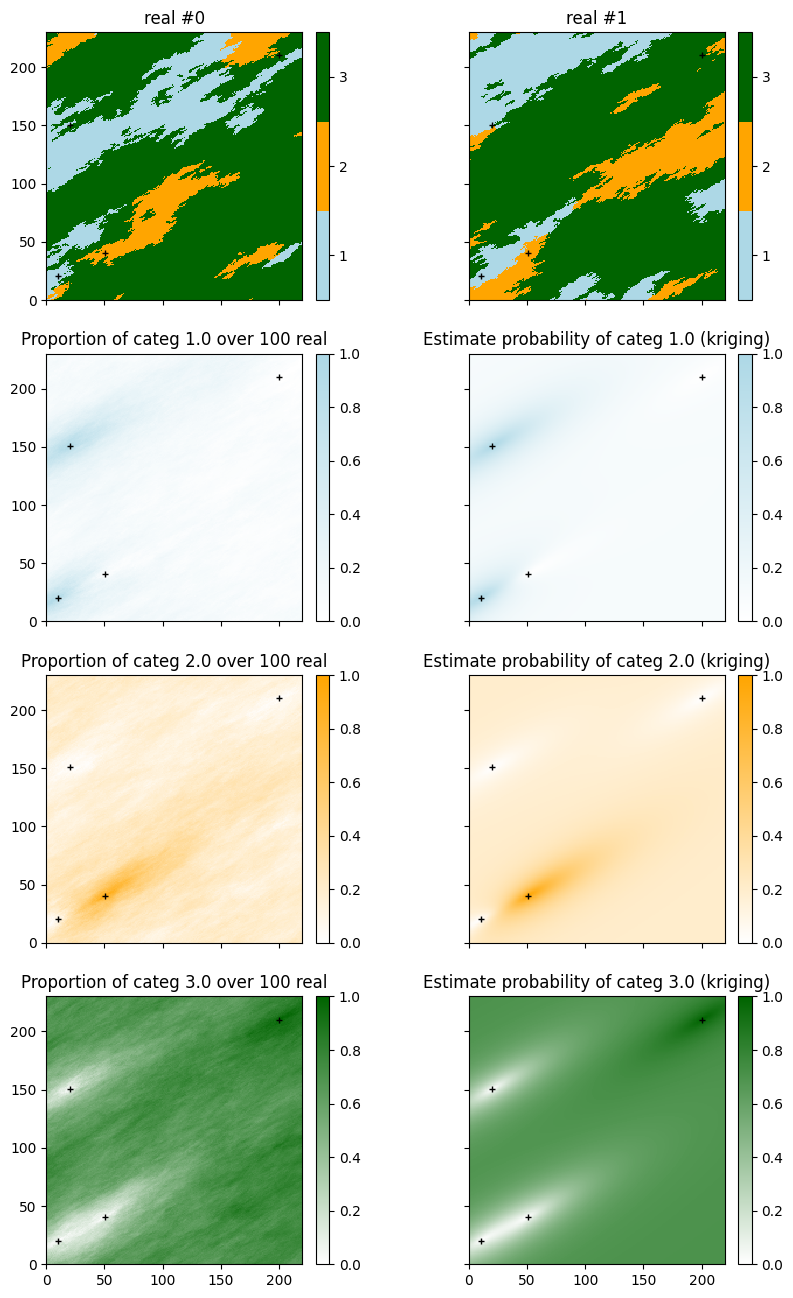

In [15]:
# Plot
plt.subplots(1+ncategory, 2, figsize=(10, 4*(1+ncategory)), sharex=True, sharey=True)

for i in range(2):
    plt.subplot(1+ncategory, 2, i+1)
    gn.imgplot.drawImage2D(simul_img, iv=i, categ=True, categVal=categVal, categCol=categCol)
    if x is not None:
        plt.plot(*x.T, '+', c='black', markersize=5) # add conditioning point locations
    plt.title(f'real #{i}')

for i in range(ncategory):
    plt.subplot(1+ncategory, 2, 2*i+3)
    gn.imgplot.drawImage2D(simul_img_prop, iv=i, vmin=0, vmax=1, cmap=cmap_categ[i])
    if x is not None:
        plt.plot(*x.T, '+', c='black', markersize=5) # add conditioning point locations
    plt.title(f'Proportion of categ {categVal[i]} over {nreal} real')

    plt.subplot(1+ncategory, 2, 2*i+4)
    gn.imgplot.drawImage2D(krig_img, iv=i, vmin=0, vmax=1, cmap=cmap_categ[i])
    if x is not None:
        plt.plot(*x.T, '+', c='black', markersize=5) # add conditioning point locations
    plt.title(f'Estimate probability of categ {categVal[i]} (kriging)')

plt.show()

### Check results

In [16]:
# Check data
# ----------
if x is not None:
    # Get index of conditioning location in the grid
    data_grid_index = [gn.img.pointToGridIndex(xk[0], xk[1], 0, sx, sy, 1., ox, oy, 0.) for xk in x] # (ix, iy, iz) for each data point
    # Check estimation
    krig_v = [krig_img.val[:, iz, iy, ix] for ix, iy, iz in data_grid_index]
    if ncategory == 1:
        print(f'Estimation: all data respected ? {np.all(np.asarray(krig_v).reshape(-1) == np.asarray([1 if vi == category_values[0] else 0 for vi in v]))}')
    else:
        print(f'Estimation: all data respected ? {np.all([np.all(krig_v[i] == np.eye(ncategory)[np.where(np.asarray(category_values) == v[i])[0][0]]) for i in range(len(x))])}')
    # Check simulation
    sim_v = [simul_img.val[:, iz, iy, ix] for ix, iy, iz in data_grid_index]
    print(f'Simulation: all data respected ? {np.all([np.all(sim_v[i] == v[i]) for i in range(len(x))])}')


Estimation: all data respected ? True
Simulation: all data respected ? True


In [17]:
# Compare probabilities
# ---------------------
if probability is not None:
    print(f'Prescribed probabilities                                    = {probability}')
    print(f'Estimation: probabilities (mean over the grid)              = {krig_img.val.mean(axis=(1,2,3))}')
    print(f'Simulation: probabilities (mean over the grid and all real.)= {[np.mean(simul_img.val == cv) for cv in category_values]}')

Prescribed probabilities                                    = [0.1, 0.2, 0.7]
Estimation: probabilities (mean over the grid)              = [0.15469426 0.21740468 0.62790107]
Simulation: probabilities (mean over the grid and all real.)= [np.float64(0.14639743083003953), np.float64(0.2107296442687747), np.float64(0.6428729249011857)]


## 2. Example - using non-stationary probabilities

### Setting probability (proportion) maps

In [18]:
# Set an image with simulation grid geometry defined above, and no variable
im = gn.img.Img(nx, ny, 1, sx, sy, 1., ox, oy, 0., nv=0)

# Get the x and y coordinates of the centers of grid cell (meshgrid)
xx = im.xx()[0]
yy = im.yy()[0]

# Equivalent:
## xg, yg: coordinates of the centers of grid cell
#xg = ox + 0.5*sx + sx*np.arange(nx)
#yg = oy + 0.5*sy + sy*np.arange(ny)
#xx, yy = np.meshgrid(xg, yg) # create meshgrid from the center of grid cells

if ncategory > 1:
    # Case with ncategory > 1
    # -----------------------
    # Define probability maps for each category
    c = 0.9
    p1 = xx - yy     
    p1 = c * (p1 - np.min(p1))/ (np.max(p1) - np.min(p1))
    p2 = c - p1
    p0 = (1. - c) * np.ones_like(p1) # 1.0 - p1 - p2 # constant map (0.1)

    probability = np.array((p0, p1, p2))

else:
    # Case with ncategory = 1
    # -----------------------
    c = 1.0
    # Define probability map for non-zero category
    p1 = xx - yy     
    p1 = c * (p1 - np.min(p1))/ (np.max(p1) - np.min(p1))
    probability = p1


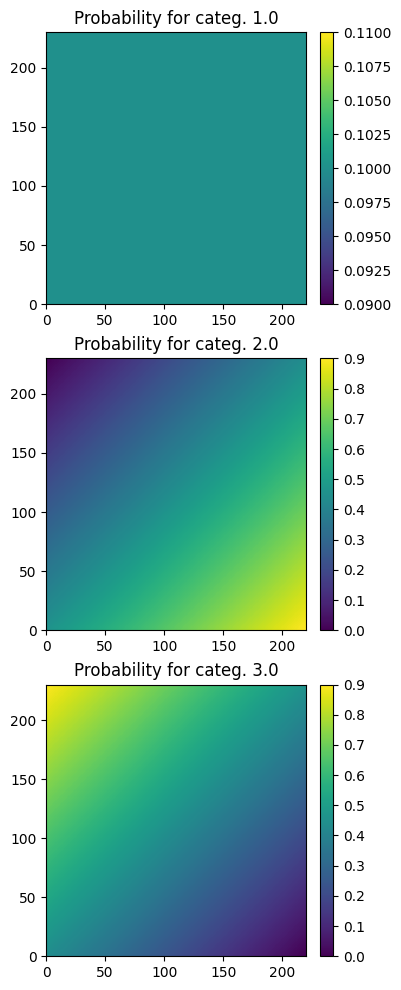

In [19]:
# Plot
# ----
# Fill image for display
probability_img = gn.img.Img(nx, ny, 1, sx, sy, 1., ox, oy, 0., nv=ncategory, val=probability)

# Display probability maps
plt.subplots(ncategory, 1, figsize=(10,ncategory*4), sharey=True)

for i in range(ncategory):
    plt.subplot(ncategory, 1, 1+i)
    gn.imgplot.drawImage2D(probability_img, iv=i, title = f'Probability for categ. {categVal[i]}')

plt.show()

### Settings - using data (optional)

In [20]:
if ncategory > 1:
    # Case with ncategory > 1
    # -----------------------
    # Data
    x = np.array([[ 10.42,  20.32],
                  [ 50.5 ,  40.5],
                  [ 20.24, 150.7],
                  [200.2 , 210.1]]) # data locations (real coordinates)
    v = [ 1., 2., 1., 3.]            # data values
    # x = None
    # v = None

    # Probability : `probability` defined above

    # Type of kriging
    method = 'simple_kriging'

else:
    # Case with ncategory = 1
    # -----------------------
    # Data
    x = np.array([[ 10.42,  20.32],
                  [ 50.5 ,  40.5],
                  [ 20.24, 150.7],
                  [200.2 , 210.1]]) # data locations (real coordinates)
    v = [ 0., 2., 2., 0.]           # data values
    # x = None
    # v = None

    # Probability : `probability` defined above

    # Type of kriging
    method = 'simple_kriging'

### Estimation of probabilities (by kriging)

In [21]:
# Computational resources
nthreads = 8

t1 = time.time() # start time
geosclassic_output = gn.geosclassicinterface.estimateIndicator(
                            category_values,               # list of categories (required)
                            cov_model,                     # covariance model(s) (required)
                            dimension, spacing, origin,    # grid geometry (dimension is required)
                            x=x, v=v,                      # data
                            probability=probability,       # probability
                            method=method,                 # type of kriging
                            use_unique_neighborhood=True,  # search neighborhood ...
                            # searchRadius=None,             
                            # searchRadiusRelative=1.2, 
                            nneighborMax=12,
                            nthreads=nthreads,              # computational resources
                            verbose=2                      # verbose mode
                        )
t2 = time.time() # end time
print('Elapsed time: {:.2g} sec'.format(t2-t1))

krig_img = geosclassic_output['image'] # output image


estimateIndicator: Geos-Classic running on 1 process... [VERSION 2.1 / BUILD NUMBER 20251023 / OpenMP 8 thread(s)]
run_MPDSOMPGeosClassicIndicatorSim: Geos-Classic running... [VERSION 2.1 / BUILD NUMBER 20251023 / OpenMP 8 thread(s)]
run_MPDSOMPGeosClassicIndicatorSim: Geos-Classic run complete
estimateIndicator: Geos-Classic (1 process) run complete
Elapsed time: 0.043 sec


In [22]:
# Total number of warning(s), and warning messages
geosclassic_output['nwarning'], geosclassic_output['warnings']

(0, [])

In [23]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Equivalent, using other computational resources
# -----------------------------------------------
# Computational resources
nthreads = 1

t1 = time.time() # start time
geosclassic_output = gn.geosclassicinterface.estimateIndicator(
                            category_values,               # list of categories (required)
                            cov_model,                     # covariance model(s) (required)
                            dimension, spacing, origin,    # grid geometry (dimension is required)
                            x=x, v=v,                      # data
                            probability=probability,       # probability
                            method=method,                 # type of kriging
                            use_unique_neighborhood=True,  # search neighborhood ...
                            # searchRadius=None,             
                            # searchRadiusRelative=1.2, 
                            nneighborMax=12,
                            nthreads=nthreads,              # computational resources
                            verbose=2                      # verbose mode
                        )
t2 = time.time() # end time
print('Elapsed time: {:.2g} sec'.format(t2-t1))

krig_img_2 = geosclassic_output['image'] # output image

print(f"Same results ? {np.allclose(krig_img.val, krig_img_2.val)}")


### Simulations

In [24]:
# Number of realizations
nreal = 100

# Seed
seed = 321

# Computational resources
nproc = 2
nthreads_per_proc = 4

t1 = time.time() # start time
geosclassic_output = gn.geosclassicinterface.simulateIndicator(
                            category_values,               # list of categories (required)
                            cov_model,                     # covariance model(s) (required)
                            dimension, spacing, origin,    # grid geometry (dimension is required)
                            x=x, v=v,                      # data
                            probability=probability,       # probability
                            method=method,                 # type of kriging
                            searchRadius=None,             # search neighborhood ...
                            searchRadiusRelative=1.2, 
                            nneighborMax=12,
                            nreal=nreal,                   # number of realizations
                            seed=seed,                     # seed
                            nproc=nproc,                   # computational resources ...
                            nthreads_per_proc=nthreads_per_proc, 
                            verbose=2                      # verbose mode
                        )
t2 = time.time() # end time
print('Elapsed time: {:.2g} sec'.format(t2-t1))

simul_img = geosclassic_output['image'] # output image


simulateIndicator: Geos-Classic running on 2 process(es)... [VERSION 2.1 / BUILD NUMBER 20251023 / OpenMP 4 thread(s)]
run_MPDSOMPGeosClassicIndicatorSim [pid=0]: Geos-Classic running... [VERSION 2.1 / BUILD NUMBER 20251023 / OpenMP 4 thread(s)]
run_MPDSOMPGeosClassicIndicatorSim [pid=0]: Geos-Classic run complete
simulateIndicator: Geos-Classic (2 process(es)) run complete
Elapsed time: 18 sec


In [25]:
# Total number of warning(s), and warning messages
geosclassic_output['nwarning'], geosclassic_output['warnings']

(0, [])

In [26]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Equivalent, using other computational resources
# -----------------------------------------------
# Computational resources
nproc = 1
nthreads_per_proc = 1

t1 = time.time() # start time
geosclassic_output = gn.geosclassicinterface.simulateIndicator(
                            category_values,               # list of categories (required)
                            cov_model,                     # covariance model(s) (required)
                            dimension, spacing, origin,    # grid geometry (dimension is required)
                            x=x, v=v,                      # data
                            probability=probability,       # probability
                            method=method,                 # type of kriging
                            searchRadius=None,             # search neighborhood ...
                            searchRadiusRelative=1.2, 
                            nneighborMax=12,
                            nreal=nreal,                   # number of realizations
                            seed=seed,                     # seed
                            nproc=nproc,                   # computational resources ...
                            nthreads_per_proc=nthreads_per_proc, 
                            verbose=2                      # verbose mode
                        )
t2 = time.time() # end time
print('Elapsed time: {:.2g} sec'.format(t2-t1))

simul_img_2 = geosclassic_output['image'] # output image

print(f"Same results ? {np.allclose(simul_img.val, simul_img_2.val)}")


### Plot the results

In [27]:
# Compute proportion of each category (pixel-wise)
simul_img_prop = gn.img.imageCategProp(simul_img, category_values)

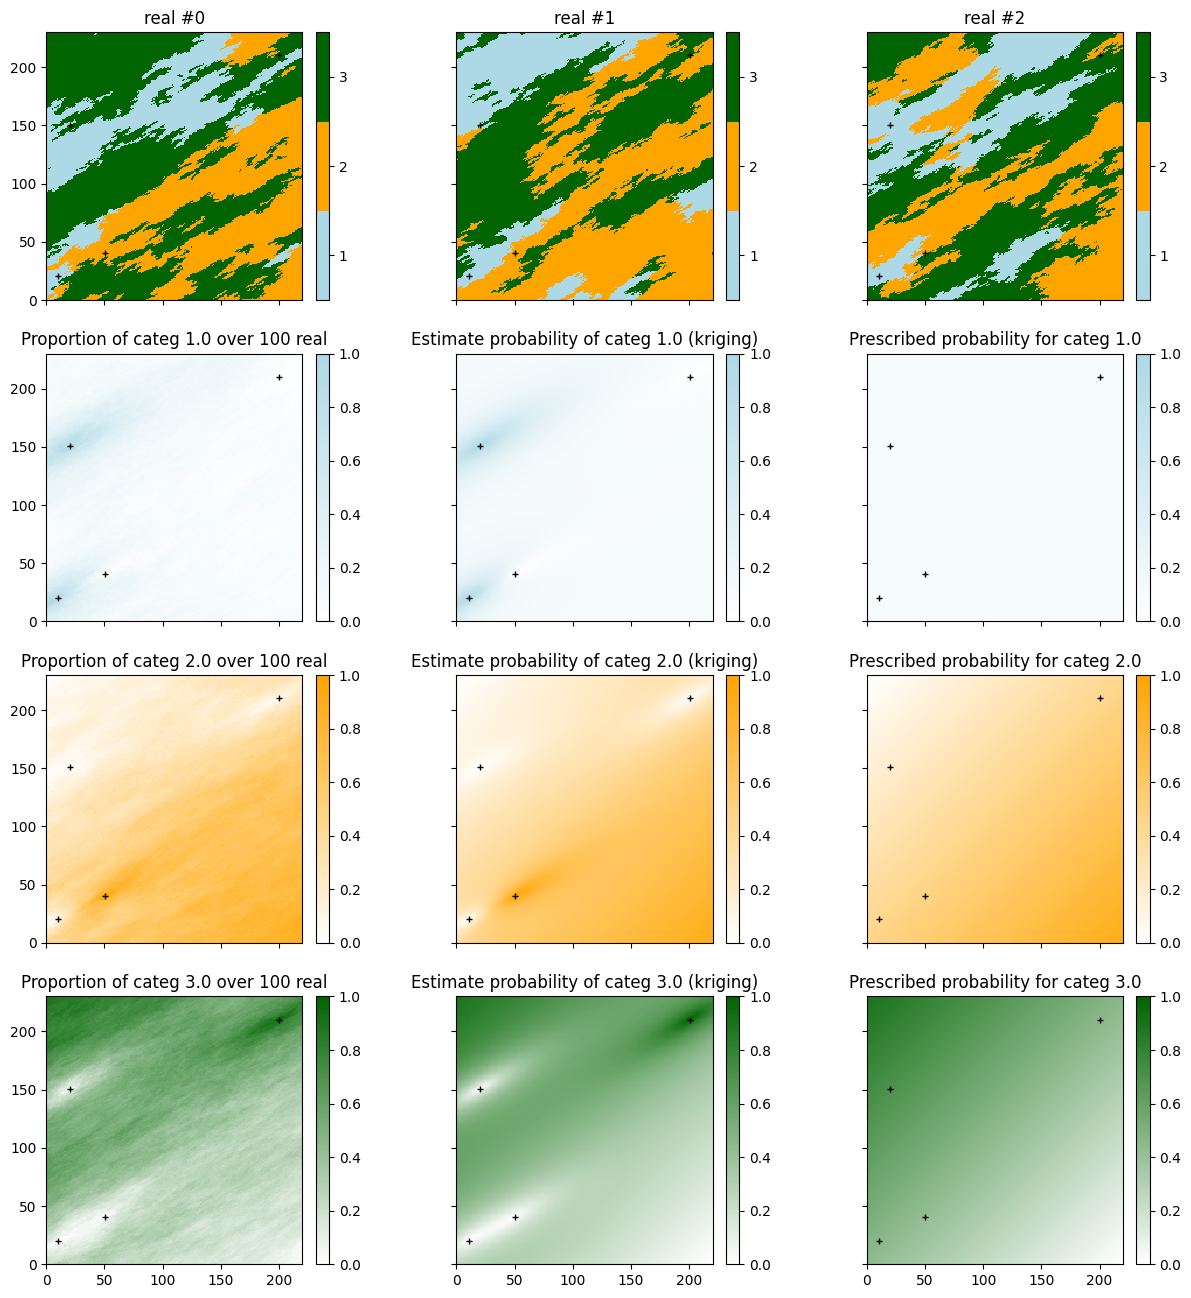

In [28]:
# Plot
plt.subplots(1+ncategory, 3, figsize=(15, (1+ncategory)*4), sharex=True, sharey=True)

for i in range(3):
    plt.subplot(1+ncategory, 3, i+1)
    gn.imgplot.drawImage2D(simul_img, iv=i, categ=True, categVal=categVal, categCol=categCol)
    if x is not None:
        plt.plot(*x.T, '+', c='black', markersize=5) # add conditioning point locations
    plt.title(f'real #{i}')

for i in range(ncategory):
    plt.subplot(1+ncategory, 3, 3*i+4)
    gn.imgplot.drawImage2D(simul_img_prop, iv=i, vmin=0, vmax=1, cmap=cmap_categ[i])
    if x is not None:
        plt.plot(*x.T, '+', c='black', markersize=5) # add conditioning point locations
    plt.title(f'Proportion of categ {categVal[i]} over {nreal} real')

    plt.subplot(1+ncategory, 3, 3*i+5)
    gn.imgplot.drawImage2D(krig_img, iv=i, vmin=0, vmax=1, cmap=cmap_categ[i])
    if x is not None:
        plt.plot(*x.T, '+', c='black', markersize=5) # add conditioning point locations
    plt.title(f'Estimate probability of categ {categVal[i]} (kriging)')

    plt.subplot(1+ncategory, 3, 3*i+6)
    gn.imgplot.drawImage2D(probability_img, iv=i, vmin=0, vmax=1, cmap=cmap_categ[i])
    if x is not None:
        plt.plot(*x.T, '+', c='black', markersize=5) # add conditioning point locations
    plt.title(f'Prescribed probability for categ {categVal[i]}')

plt.show()

### Check results

In [29]:
# Check data
# ----------
if x is not None:
    # Get index of conditioning location in the grid
    data_grid_index = [gn.img.pointToGridIndex(xk[0], xk[1], 0, sx, sy, 1., ox, oy, 0.) for xk in x] # (ix, iy, iz) for each data point
    # Check estimation
    krig_v = [krig_img.val[:, iz, iy, ix] for ix, iy, iz in data_grid_index]
    if ncategory == 1:
        print(f'Estimation: all data respected ? {np.all(np.asarray(krig_v).reshape(-1) == np.asarray([1 if vi == category_values[0] else 0 for vi in v]))}')
    else:
        print(f'Estimation: all data respected ? {np.all([np.all(krig_v[i] == np.eye(ncategory)[np.where(np.asarray(category_values) == v[i])[0][0]]) for i in range(len(x))])}')
    # Check simulation
    sim_v = [simul_img.val[:, iz, iy, ix] for ix, iy, iz in data_grid_index]
    print(f'Simulation: all data respected ? {np.all([np.all(sim_v[i] == v[i]) for i in range(len(x))])}')


Estimation: all data respected ? True
Simulation: all data respected ? True
